# Building Machine Learning Pipelines: Data Analysis Phase
In this and the upcoming videos we will focus on creating Machine Learning Pipelines considering all the life cycle of a Data Science Projects. This will be important for professionals who have not worked with huge dataset.

# Project Name: OLIST DATA : DATA ANALYSIS

# All the Lifecycle In A Data Science Projects¶
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

# Libs and Functions

In [7]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

#extra libraries nedded for the project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
#import missingno as msno
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time
import sys
import math
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#import folium
#from folium.plugins import Fullscreen
#import geopandas as gpd
import json
#from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [24]:
data1 = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\datasets_55151_195341_olist_sellers_dataset.csv')
seller =data1.ix[1:100, :]
print("seller data size", seller.shape)

data2 = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\datasets_55151_195341_product_category_name_translation.csv')
product_category_name_translation=data2.ix[1:100, :]
print("product_category_name_translation data size", product_category_name_translation.shape)

data3 = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_customers_dataset.csv')
olist_customers_dataset=data3.ix[1:100, :]
print("olist_customers_dataset data size", olist_customers_dataset.shape)

data4 = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_order_items_dataset.csv')
olist_order_items_dataset=data4.ix[1:100, :]
print("olist_order_items_dataset data size", olist_order_items_dataset.shape)

data5 = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_order_payments_dataset.csv')
olist_order_payments_dataset=data5.ix[1:100, :]
print("olist_order_payments_dataset data size", olist_order_payments_dataset.shape)

data6 = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_order_reviews_dataset.csv')
olist_order_reviews_dataset=data6.ix[1:100, :]
print("olist_order_reviews_dataset data size", olist_order_reviews_dataset.shape)

data7 = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_orders_dataset.csv')
olist_orders_dataset=data7.ix[1:100, :]
print("olist_orders_dataset.csv data size", olist_orders_dataset.shape)

data8 = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_products_dataset.csv')
olist_products_dataset=data8.ix[1:100, :]
print("olist_products_dataset.csv data size", olist_products_dataset.shape)


seller data size (100, 4)
product_category_name_translation data size (70, 2)
olist_customers_dataset data size (100, 5)
olist_order_items_dataset data size (100, 7)
olist_order_payments_dataset data size (100, 5)
olist_order_reviews_dataset data size (100, 7)
olist_orders_dataset.csv data size (100, 8)
olist_products_dataset.csv data size (100, 9)


# EDA STARTS 

In Data Analysis We will Analyze To Find out the below stuff

1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

In [71]:
olist_sellers = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\datasets_55151_195341_olist_sellers_dataset.csv')

print("seller data size", olist_sellers_dataset.shape)

product_category_name_translation = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\datasets_55151_195341_product_category_name_translation.csv')

print("product_category_name_translation data size", product_category_name_translation.shape)

olist_customer = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_customers_dataset.csv')

print("olist_customers_dataset data size", olist_customer.shape)

olist_order_items = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_order_items_dataset.csv')

print("olist_order_items_dataset data size", olist_order_items.shape)

olist_order_payments = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_order_payments_dataset.csv')

print("olist_order_payments_dataset data size", olist_order_payments.shape)

olist_order_reviews  = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_order_reviews_dataset.csv')

print("olist_order_reviews_dataset data size", olist_order_reviews.shape)

olist_orders  = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_orders_dataset.csv')

print("olist_orders_dataset.csv data size", olist_orders.shape)

olist_products  = pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\OLIST\DATA\olist_products_dataset.csv')

print("olist_products_dataset.csv data size", olist_products.shape)


seller data size (3095, 4)
product_category_name_translation data size (71, 2)
olist_customers_dataset data size (99441, 5)
olist_order_items_dataset data size (112650, 7)
olist_order_payments_dataset data size (103886, 5)
olist_order_reviews_dataset data size (100000, 7)
olist_orders_dataset.csv data size (99441, 8)
olist_products_dataset.csv data size (32951, 9)


In [78]:
dataframes = {
    'Customers': olist_customer,
    'Service_Orders': olist_orders,
    'Items': olist_order_items,
    'Service_Payments': olist_order_payments,
    'Service_Reviews': olist_order_reviews,
    'Products': olist_products,
    'Sellers': olist_sellers
}

for name, df in dataframes.items():
    print(f'{name}: {len(df.columns)} columns')
    print(f'{list(df.columns)}\n')

Customers: 5 columns
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Service_Orders: 8 columns
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Items: 7 columns
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Service_Payments: 5 columns
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Service_Reviews: 7 columns
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Products: 9 columns
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

Sellers: 4 columns
['sell

In [79]:
# Foreign keys
for name, df in dataframes.items():
    chaves = [col for col in df.columns if '_id' in col or 'code' in col]
    print(f'{name}: {len(chaves)} PKs or FKs')
    print(f'{chaves}\n')

Customers: 3 PKs or FKs
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix']

Service_Orders: 2 PKs or FKs
['order_id', 'customer_id']

Items: 4 PKs or FKs
['order_id', 'order_item_id', 'product_id', 'seller_id']

Service_Payments: 1 PKs or FKs
['order_id']

Service_Reviews: 2 PKs or FKs
['review_id', 'order_id']

Products: 1 PKs or FKs
['product_id']

Sellers: 2 PKs or FKs
['seller_id', 'seller_zip_code_prefix']



# Null Data

In [80]:
for name, df in dataframes.items():
    print(f'{name:<12}- {df.isnull().any().any()}')

Customers   - False
Service_Orders- True
Items       - False
Service_Payments- False
Service_Reviews- True
Products    - True
Sellers     - False


In [81]:
for name, df in dataframes.items():
    if df.isnull().any().any():
        print(f'Dataset: {name}\n')
        print(f'{df.isnull().sum()}\n')

Dataset: Service_Orders

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dataset: Service_Reviews

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dataset: Products

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64



# Data Types

In [83]:
for name, df in dataframes.items():
    print(f'Dataset: {name}\n')
    print(f'{df.dtypes}\n')


Dataset: Customers

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Dataset: Service_Orders

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Dataset: Items

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Dataset: Service_Payments

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           flo

# We can see that in some attributes we have the wrong data type assigned. For example, there are date columns in orders dataset assigned as strings. Let's apply the transformations

In [85]:
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
           'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in time_cols:
    olist_orders[col] = pd.to_datetime(olist_orders[col])
    
# Checking
olist_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

# Graphical Exploration


*** It is known that online shopping is growing up each day. In Brazil, this is no different. Few years ago, there was a kind of fear about buying things online. Nowadays, many people prefer the conveniance and facility that only e-commerce can offer. ***

Does the data we have in hands show this perspective?

In [87]:
# Creating new year column
olist_orders['order_purchase_year'] = \
olist_orders['order_purchase_timestamp'].apply(lambda x: x.year)

# Creating new month column
olist_orders['order_purchase_month'] = \
olist_orders['order_purchase_timestamp'].apply(lambda x: x.month)

# Creating new day of week column
olist_orders['order_purchase_dayofweek'] = \
olist_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)

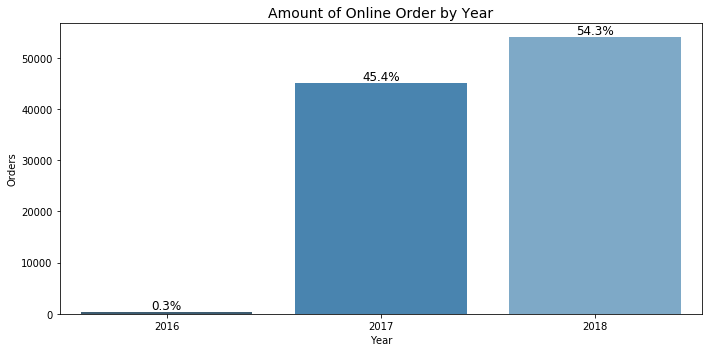

In [90]:
# Preparing the chart
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='order_purchase_year', data=olist_orders, palette='Blues_d')
#format_spines(ax, right_border=False)

# Showing frequency
ncount = len(olist_orders)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', size=12)

ax.set_title('Amount of Online Order by Year', size=14)
ax.set_ylabel('Orders')
ax.set_xlabel('Year')

plt.tight_layout()
plt.show()

In [106]:
for feature in olist_orders:
    data=olist_orders.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature]=np.where(data[feature].isnull() , 1 ,0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['order_approved_at'].median().plot.bar()
    plt.title(feature)
    plt.show()

DataError: No numeric types to aggregate